In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing csvs
hse1 = pd.read_csv('28housefinal1.csv')
hse2 = pd.read_csv('28housefinal2.csv')
hse3 = pd.read_csv('28housefinal3.csv')
hse170 = pd.read_csv('28housefinal170.csv')

In [4]:
print(hse1.info())
print("#"*40)
print(hse2.info())
print("#"*40)
print(hse3.info())
print("#"*40)
print(hse170.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349555 entries, 0 to 349554
Data columns (total 12 columns):
id                349555 non-null int64
addr              349555 non-null object
catfathername     349555 non-null object
catname           349555 non-null object
block             205770 non-null object
rootid            349555 non-null int64
price_value       349555 non-null int64
date              349555 non-null object
sq_price_value    349555 non-null float64
area              349555 non-null object
winloss           193592 non-null float64
img_url           21 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 32.0+ MB
None
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349641 entries, 0 to 349640
Data columns (total 12 columns):
id                349641 non-null int64
addr              349641 non-null object
catfathername     349641 non-null object
catname           349641 non-null object
block             2

In [5]:
hse1.head()

,id,addr,catfathername,catname,block,rootid,price_value,date,sq_price_value,area,winloss,img_url
0,460263,2/F Room G,Causeway Bay,City Mansion,NaN,1,90000000,23-Jun,0.0,--,11150.0,https://firebasestorage.googleapis.com/v0/b/pr...
1,355230,4/F Room 10,Fortress Hill Road,Hang Ying House,NaN,1,160000000,18-Aug,0.0,--,7900.0,https://firebasestorage.googleapis.com/v0/b/pr...
2,497093,1#/F Room B,Wan Chai,Tung Hing Building,NaN,1,6600000,28-Sep,0.0,--,6500.0,https://firebasestorage.googleapis.com/v0/b/pr...
3,496482,4/F Room 92,Sai Yin Pun,Kong Tak Building,NaN,1,29000000,1-Sep,0.0,--,5700.0,https://firebasestorage.googleapis.com/v0/b/pr...
4,496480,1/F Room 92,Sai Yin Pun,Kong Tak Building,NaN,1,29000000,1-Sep,0.0,--,5700.0,https://firebasestorage.googleapis.com/v0/b/pr...


In [6]:
# combine csv
full = pd.concat([hse1, hse2, hse3, hse170], ignore_index=True)

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048585 entries, 0 to 1048584
Data columns (total 12 columns):
id                1048563 non-null float64
addr              1048563 non-null object
catfathername     1048563 non-null object
catname           1048563 non-null object
block             766300 non-null object
rootid            1048563 non-null float64
price_value       1048563 non-null float64
date              1048563 non-null object
sq_price_value    1048563 non-null float64
area              1048563 non-null object
winloss           652896 non-null float64
img_url           81 non-null object
dtypes: float64(5), object(7)
memory usage: 96.0+ MB


In [8]:
full.tail()

,id,addr,catfathername,catname,block,rootid,price_value,date,sq_price_value,area,winloss,img_url
1048580,764402.0,BLOCK 1 2#/F Room E,Tung Chung,Seaview Crescent,BLOCK 1,170.0,2065000.0,13/7/2009,3005.82,687ft<sup>2</sup>,NaN,NaN
1048581,734748.0,BLOCK 25 2#/F Room A,Ma Wan,Park Island,BLOCK 25,170.0,3320000.0,13/7/2009,4150.00,800ft<sup>2</sup>,NaN,NaN
1048582,734641.0,(LOW-RISE) 7 5/F Room A,Tung Chung,Coastal Skyline,(LOW-RISE) 7,170.0,4716750.0,10/7/2009,4808.10,981ft<sup>2</sup>,NaN,NaN
1048583,764362.0,BLOCK 15 3/F Room G,Ma Wan,Park Island,BLOCK 15,170.0,1900000.0,10/7/2009,2790.01,681ft<sup>2</sup>,NaN,NaN
1048584,1156019.0,NO.55 CAPERIDGE DRIVE 3/F Room B,Discovery Bay,Discovery Bay,NO.55 CAPERIDGE DRIVE,170.0,5900000.0,10/7/2009,0.00,--,NaN,NaN


In [9]:
# missing values
missing = full.isnull().sum().sort_values(ascending=False)
pct_missing = (full.isnull().sum()/full.isnull().count()).sort_values(ascending=False) * 100
df_missing = pd.concat([missing, pct_missing], axis=1, keys=['missing', 'pct'])
round(df_missing)

,missing,pct
img_url,1048504,100.0
winloss,395689,38.0
block,282285,27.0
area,22,0.0
sq_price_value,22,0.0
date,22,0.0
price_value,22,0.0
rootid,22,0.0
catname,22,0.0
catfathername,22,0.0


In [10]:
# cleaning data
full = full.drop(['img_url', 'date', 'rootid'], axis=1)
full['area'] = full['area'].replace('--','U')
full['area'] = full['area'].fillna('U')
full['area'] = full['area'].apply(lambda x: x.split('<')[0].split('ft')[0])
full['area'] = full['area'].replace('U', np.NaN)
full['area'] = full['area'].astype('float')

In [11]:
# replace missing values
location_group = full.groupby(['catfathername', 'catname'])
full['area'] = location_group['area'].apply(lambda x: x.fillna(x.median()))
full['area'] = full.groupby('catfathername')['area'].apply(lambda x:x.fillna(x.median()))
kowloon_bay_area = full[full['catfathername'] =='Kowloon Bay']['area'].median()
full['area'] = full['area'].fillna(kowloon_bay_area)

In [12]:
full.isnull().sum()

id                    22
addr                  22
catfathername         22
catname               22
block             282285
price_value           22
sq_price_value        22
area                   0
winloss           395689
dtype: int64

In [13]:
# drop unecessary columns
full.drop(['block', 'winloss'], axis=1, inplace=True)

In [14]:
full['price_millions'] = full['price_value'] / 1000000
full['sq_price_value'] = full['price_value'] / full['area']

In [15]:
area_list = full['catfathername'].unique()

In [16]:
full = full.dropna()

Text(0.5,1,'price_millions correlation')

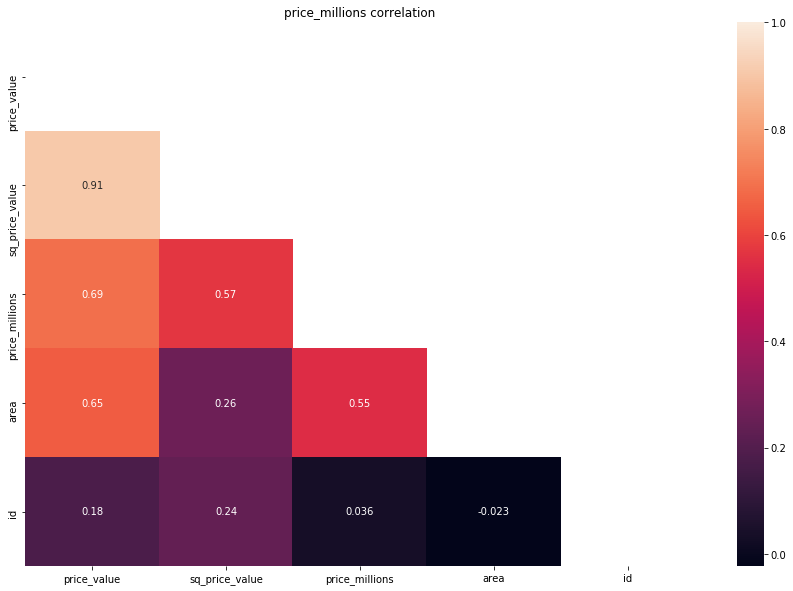

In [43]:
corr = full.corr()
ix = corr.abs().sort_values(by='price_value', ascending=False).index
df_sort = full.loc[:, ix]
#top20 = df_sort.iloc[:, :20]
df_corr = df_sort.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, mask=mask, annot=True)
plt.title('price_millions correlation')

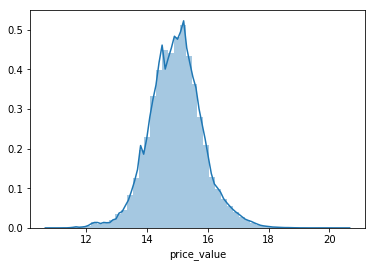

In [18]:
sns.distplot(np.log(full['price_value']),50)

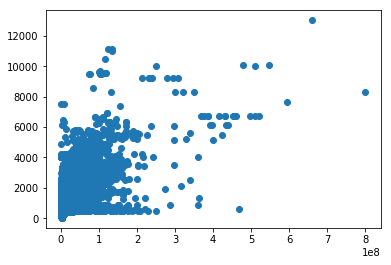

In [19]:
plt.scatter(x='price_value', y='area', data=full)

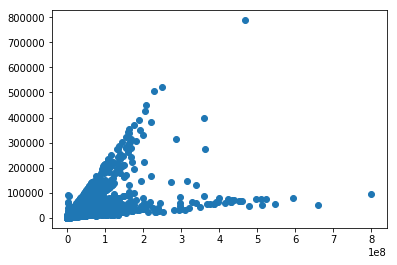

In [20]:
plt.scatter(x='price_value', y='sq_price_value', data=full)

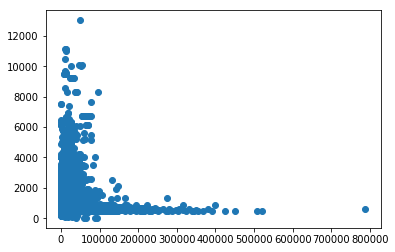

In [21]:
plt.scatter(x='sq_price_value', y='area', data=full)

In [22]:
# normalize data
full[['price_value', 'sq_price_value', 'area']] = np.log(full[['price_value', 'sq_price_value', 'area']])

In [23]:
full.head()

,id,addr,catfathername,catname,price_value,sq_price_value,area,price_millions
0,460263.0,2/F Room G,Causeway Bay,City Mansion,18.315320,12.100712,6.214608,90.0
1,355230.0,4/F Room 10,Fortress Hill Road,Hang Ying House,18.890684,12.480509,6.410175,160.0
2,497093.0,1#/F Room B,Wan Chai,Tung Hing Building,15.702580,9.407314,6.295266,6.6
3,496482.0,4/F Room 92,Sai Yin Pun,Kong Tak Building,17.182806,11.009020,6.173786,29.0
4,496480.0,1/F Room 92,Sai Yin Pun,Kong Tak Building,17.182806,11.009020,6.173786,29.0


In [24]:
x = full.drop(['id', 'price_value','addr'], axis = 1)
y = full['price_value']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123 )

In [27]:
xtrain = x_train[['sq_price_value', 'area']]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
linreg = LinearRegression()

In [30]:
linreg.fit(xtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linreg.predict(xtrain)

array([14.46783574, 13.81350856, 15.22160755, ..., 14.24077829,
       15.60727003, 15.68731273])

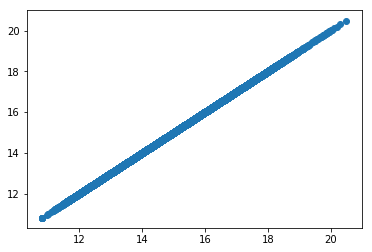

In [32]:
plt.scatter(y_train, linreg.predict(xtrain))

In [36]:
xtest = x_test[['sq_price_value', 'area']]

In [37]:
# linear regression predictin
y_pred = linreg.predict(xtest)

In [39]:
# error 
mse = mean_squared_error(y_test, linreg.predict(xtest))

In [40]:
print(np.sqrt(mse))

1.1572123931206366e-14


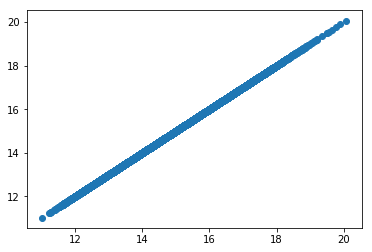

In [41]:
plt.scatter(y_test, y_pred)

In [42]:
x_test['catfathername'].nunique()

97

In [44]:
x_test['prediction_price'] = np.exp(y_pred)

In [47]:
x_test['predict_millions'] = x_test['prediction_price'] / 1000000

In [50]:
location_prediction = x_test.groupby(['catfathername', 'catname'])['predict_millions'].mean()

In [89]:
# to csv
prediction_csv = location_prediction.to_frame()
prediction_csv.to_csv('28hse_prediction.csv',index=True)

In [62]:
# finding difference between index
x_test_cat = x_test.set_index('catfathername')
full_cat = full.set_index('catfathername')
x_test_idx = x_test_cat[~x_test_cat.index.duplicated(keep='first')]
full_cat_idx = full_cat[~full_cat.index.duplicated(keep='first')]
full_cat_idx.index.difference(x_test_idx.index)

In [84]:
full_cat_idx.index.difference(x_test_idx.index)

Index(['Clear Water Bay', 'Villa'], dtype='object', name='catfathername')

- no prediction for Clear Water Bay and Villa

In [90]:
pd.read_csv('28hse_prediction.csv')

,catfathername,catname,predict_millions
0,Aberdeen,Abba House,2.087042
1,Aberdeen,Aberdeen Centre,2.466048
2,Aberdeen,Aberdeen Harbour Mansion,1.596844
3,Aberdeen,Ap Lei Chau Centre,1.535851
4,Aberdeen,Bayshore Apartments,3.528747
5,Aberdeen,BroadView Court,1.745402
6,Aberdeen,Coble Court,1.711673
7,Aberdeen,Comfort Centre,2.211083
8,Aberdeen,Command Tower,1.468167
9,Aberdeen,Ever Secure Mansion,1.400780
